# Train Data EDA

1. 데이터 불러오기

In [1]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from datasets import load_from_disk

dataset = load_from_disk("/content/drive/MyDrive/Colab Notebooks/부스트캠프/프로젝트/Open Document Question Answer 프로젝트/data_mrc/train_dataset")

train_dataset = dataset['train']
valid_dataset = dataset['validation']

2. 데이터셋 크기, 결측치 확인하기

In [4]:
import pandas as pd

# train 데이터셋 크기, 결측치 출력
train_df = pd.DataFrame(train_dataset)

print(f'Train 데이터셋의 크기: {len(train_dataset)}')
print('Train 데이터셋의 결측치:')
print(train_df.isnull().sum())

print('-----------------------------------------------')

# valid 데이터셋 크기, 결측치 출력
valid_df = pd.DataFrame(valid_dataset)

print(f'Valid 데이터셋의 크기: {len(valid_dataset)}')
print('Valid 데이터셋의 결측치:')
print(valid_df.isnull().sum())

Train 데이터셋의 크기: 3952
Train 데이터셋의 결측치:
title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64
-----------------------------------------------
Valid 데이터셋의 크기: 240
Valid 데이터셋의 결측치:
title                0
context              0
question             0
id                   0
answers              0
document_id          0
__index_level_0__    0
dtype: int64


3. 텍스트 데이터 분석(질문 길이 분석, 답변 텍스트 분석)

In [5]:
# 시각화 준비

# 한글 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [6]:
import matplotlib.font_manager as fm
import matplotlib as mpl
import warnings

# 설치된 나눔 폰트의 경로 추출
font_paths = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

# 폰트 matplotlib에 추가
for font_path in font_paths:
    fm.fontManager.addfont(font_path)

# 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'

# 경고 메시지 미출력 설정
warnings.filterwarnings('ignore')

Train 데이터셋 질문 길이 분석:
count    3952.000000
mean       29.322368
std         8.727421
min         8.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        78.000000
Name: question_length, dtype: float64
-----------------------------------------------
Validation 데이터셋 질문 길이 분석:
count    240.000000
mean      29.195833
std        8.728301
min        9.000000
25%       23.000000
50%       29.000000
75%       35.000000
max       59.000000
Name: question_length, dtype: float64


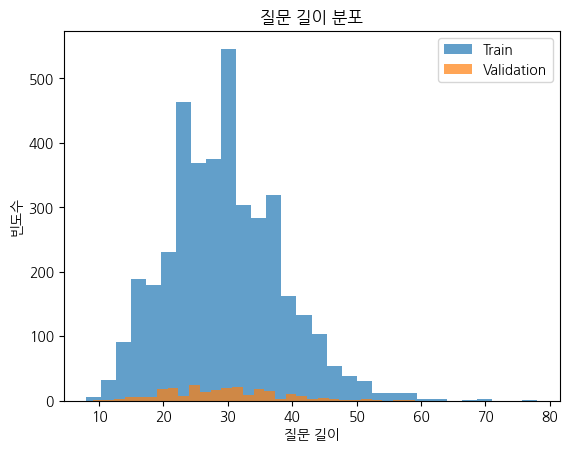

In [7]:
import matplotlib.pyplot as plt

# 질문의 길이 계산
train_df['question_length'] = train_df['question'].apply(len)
valid_df['question_length'] = valid_df['question'].apply(len)

# 질문 길이의 통계량 계산
print("Train 데이터셋 질문 길이 분석:")
print(train_df['question_length'].describe())

print('-----------------------------------------------')

print("Validation 데이터셋 질문 길이 분석:")
print(valid_df['question_length'].describe())

# 질문 길이 히스토그램 시각화
plt.hist(train_df['question_length'], bins=30, alpha=0.7, label='Train')
plt.hist(valid_df['question_length'], bins=30, alpha=0.7, label='Validation')
plt.title("질문 길이 분포")
plt.xlabel("질문 길이")
plt.ylabel("빈도수")
plt.legend(loc='upper right')
plt.show()

In [8]:
# 답변의 길이 계산
train_df['answer_text_length'] = train_df['answers'].apply(lambda x: len(x['text'][0]))
valid_df['answer_text_length'] = valid_df['answers'].apply(lambda x: len(x['text'][0]))

# 답변 시작 위치 분석 (answer_start)
train_df['answer_start'] = train_df['answers'].apply(lambda x: x['answer_start'][0])
valid_df['answer_start'] = valid_df['answers'].apply(lambda x: x['answer_start'][0])

# 답변 길이와 시작 위치에 대한 통계량 계산
print("Train 데이터셋 답변 길이 분석:")
print(train_df['answer_text_length'].describe())

print('-----------------------------------------------')

print("Validation 데이터셋 답변 길이 분석:")
print(valid_df['answer_text_length'].describe())

print('-----------------------------------------------')

print("Train 데이터셋 답변 시작 위치 분석:")
print(train_df['answer_start'].describe())

print('-----------------------------------------------')

print("Validation 데이터셋 답변 시작 위치 분석:")
print(valid_df['answer_start'].describe())

Train 데이터셋 답변 길이 분석:
count    3952.000000
mean        6.275051
std         5.346842
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        83.000000
Name: answer_text_length, dtype: float64
-----------------------------------------------
Validation 데이터셋 답변 길이 분석:
count    240.000000
mean       6.912500
std        6.858755
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       64.000000
Name: answer_text_length, dtype: float64
-----------------------------------------------
Train 데이터셋 답변 시작 위치 분석:
count    3952.000000
mean      376.794028
std       309.122555
min         0.000000
25%       138.000000
50%       310.000000
75%       538.000000
max      1974.000000
Name: answer_start, dtype: float64
-----------------------------------------------
Validation 데이터셋 답변 시작 위치 분석:
count     240.000000
mean      391.516667
std       311.943965
min         0.000000
25%       154.000000
50%       317.000000
75%       536.000

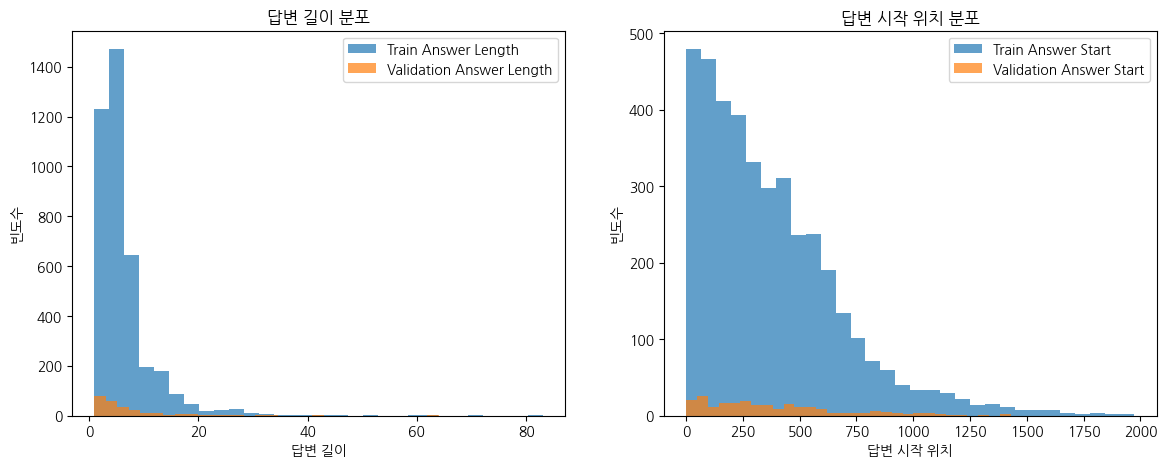

In [9]:
# 답변 길이 분포, 답변 시작 위치 분포 그래프 출력

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 첫 번째 그래프: 답변 길이 분포
axes[0].hist(train_df['answer_text_length'], bins=30, alpha=0.7, label='Train Answer Length')
axes[0].hist(valid_df['answer_text_length'], bins=30, alpha=0.7, label='Validation Answer Length')
axes[0].set_title("답변 길이 분포")
axes[0].set_xlabel("답변 길이")
axes[0].set_ylabel("빈도수")
axes[0].legend(loc='upper right')

# 두 번째 그래프: 답변 시작 위치 분포
axes[1].hist(train_df['answer_start'], bins=30, alpha=0.7, label='Train Answer Start')
axes[1].hist(valid_df['answer_start'], bins=30, alpha=0.7, label='Validation Answer Start')
axes[1].set_title("답변 시작 위치 분포")
axes[1].set_xlabel("답변 시작 위치")
axes[1].set_ylabel("빈도수")
axes[1].legend(loc='upper right')

# 그래프 출력
plt.show()

4. 문서 내 문맥 분석(토큰화, 문서 길이 분포)

In [10]:
from transformers import BertTokenizer
from collections import Counter
import matplotlib.pyplot as plt

# KLUE BERT 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

# 전체 문서에 대해 토큰화 수행
all_train_tokens = []
for context in train_dataset:
    tokens = tokenizer.tokenize(context['context'])
    all_train_tokens.extend(tokens)

all_valid_tokens = []
for context in valid_dataset:
    tokens = tokenizer.tokenize(context['context'])
    all_valid_tokens.extend(tokens)

# 토큰 빈도 계산
train_token_counts = Counter(all_train_tokens)
valid_token_counts = Counter(all_valid_tokens)

# 상위 30개 빈도 높은 토큰 선택 (train과 valid에서 각각 상위 30개)
train_top_tokens = train_token_counts.most_common(30)
valid_top_tokens = valid_token_counts.most_common(30)

# 두 데이터셋의 토큰과 빈도 준비
train_tokens, train_counts = zip(*train_top_tokens)
valid_tokens, valid_counts = zip(*valid_top_tokens)


# 빈도 높은 30개의 토큰 텍스트로 출력
print("Train 데이터셋 상위 30개 토큰:")
for token, count in train_top_tokens:
    print(f"{token}: {count}")

print('-----------------------------------------------')

print("\nValid 데이터셋 상위 30개 토큰:")
for token, count in valid_top_tokens:
    print(f"{token}: {count}")

tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

Train 데이터셋 상위 30개 토큰:
.: 53108
##의: 51423
##는: 49876
##을: 45919
##에: 43815
##다: 43126
,: 33730
##이: 30281
##은: 28438
[UNK]: 28279
##를: 24963
n: 22803
##하: 21106
##가: 18221
##고: 17835
있: 16401
##었: 15794
##에서: 15473
##로: 14716
##으로: 14347
##한: 14121
##게: 12196
##년: 11757
##들: 11345
##과: 11098
##되: 9813
##했: 9425
##였: 9389
그: 9323
##지: 9320
-----------------------------------------------

Valid 데이터셋 상위 30개 토큰:
.: 3155
##는: 3105
##의: 3076
##을: 2784
##에: 2764
##다: 2580
,: 2043
##이: 1858
##은: 1761
[UNK]: 1731
##를: 1582
n: 1368
##하: 1318
##고: 1130
있: 1106
##가: 1084
##었: 932
##로: 908
##에서: 883
##으로: 879
##한: 842
##게: 740
##들: 721
##년: 670
##였: 636
##되: 625
##과: 625
그: 596
##지: 591
##했: 569


Train 데이터셋 토큰 길이 분포:
길이 1: 383696 개
길이 2: 488891 개
길이 3: 889334 개
길이 4: 156778 개
길이 5: 37959 개
길이 6: 557 개
길이 7: 197 개
길이 8: 8 개
길이 9: 6 개
길이 10: 3 개
길이 11: 1 개
길이 13: 2 개
-----------------------------------------------

Valid 데이터셋 토큰 길이 분포:
길이 1: 23500 개
길이 2: 29655 개
길이 3: 53743 개
길이 4: 9395 개
길이 5: 2280 개
길이 6: 53 개
길이 7: 7 개


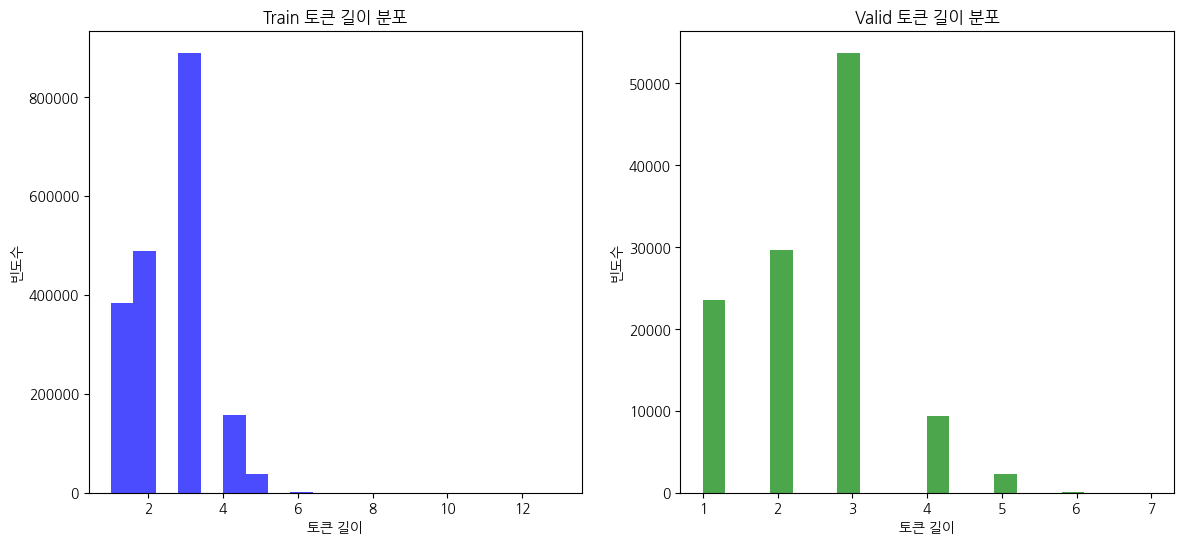

In [11]:
import matplotlib.pyplot as plt

# 토큰 길이 계산 (train 데이터셋)
train_token_lengths = [len(token) for token in all_train_tokens]
valid_token_lengths = [len(token) for token in all_valid_tokens]

# 토큰 길이 분포 계산
train_length_distribution = Counter(train_token_lengths)
valid_length_distribution = Counter(valid_token_lengths)

# Train 데이터셋 토큰 길이 분포 출력
print("Train 데이터셋 토큰 길이 분포:")
for length, count in sorted(train_length_distribution.items()):
    print(f"길이 {length}: {count} 개")

print('-----------------------------------------------')

# Valid 데이터셋 토큰 길이 분포 출력
print("\nValid 데이터셋 토큰 길이 분포:")
for length, count in sorted(valid_length_distribution.items()):
    print(f"길이 {length}: {count} 개")

# 히스토그램 그리기
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Train 토큰 길이 분포
ax[0].hist(train_token_lengths, bins=20, color='blue', alpha=0.7)
ax[0].set_title('Train 토큰 길이 분포')
ax[0].set_xlabel('토큰 길이')
ax[0].set_ylabel('빈도수')

# Valid 토큰 길이 분포
ax[1].hist(valid_token_lengths, bins=20, color='green', alpha=0.7)
ax[1].set_title('Valid 토큰 길이 분포')
ax[1].set_xlabel('토큰 길이')
ax[1].set_ylabel('빈도수')

plt.show()

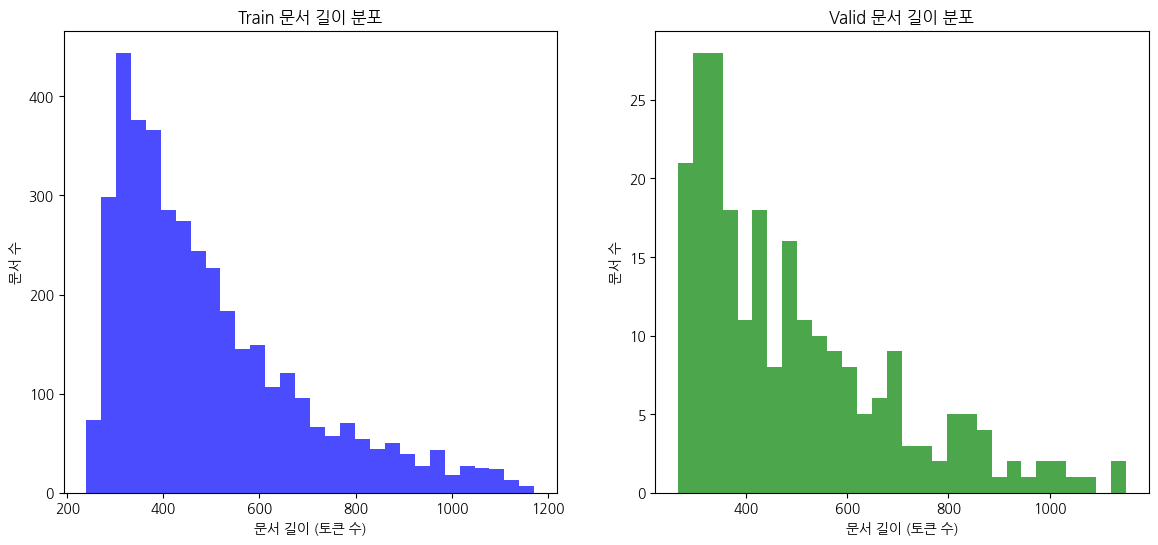

In [12]:
import matplotlib.pyplot as plt

# 문서 길이 계산 (train과 valid 데이터셋)
train_document_lengths = [len(tokenizer.tokenize(context['context'])) for context in train_dataset]
valid_document_lengths = [len(tokenizer.tokenize(context['context'])) for context in valid_dataset]

# 히스토그램 그리기
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Train 문서 길이 분포
ax[0].hist(train_document_lengths, bins=30, color='blue', alpha=0.7)
ax[0].set_title('Train 문서 길이 분포')
ax[0].set_xlabel('문서 길이 (토큰 수)')
ax[0].set_ylabel('문서 수')

# Valid 문서 길이 분포
ax[1].hist(valid_document_lengths, bins=30, color='green', alpha=0.7)
ax[1].set_title('Valid 문서 길이 분포')
ax[1].set_xlabel('문서 길이 (토큰 수)')
ax[1].set_ylabel('문서 수')

plt.show()

5. 문서 제목 및 document_id 분석

In [13]:
# train 데이터셋 중복된 document_id 확인
train_duplicate_data = pd.DataFrame()

train_duplicate_ids = train_df[train_df.duplicated(subset='document_id', keep=False)]

for doc_id in train_duplicate_ids['document_id'].unique():
    subset = train_df[train_df['document_id'] == doc_id]
    train_duplicate_data = pd.concat([train_duplicate_data, subset])

train_duplicate_data.to_csv('train_duplicate_data.csv')
train_duplicate_data

,title,context,question,id,answers,document_id,__index_level_0__,question_length,answer_text_length,answer_start
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,30,2,510
3364,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 소박한 사람이라며 칭찬한 인물은?,mrc-0-003465,"{'answer_start': [188], 'text': ['부베']}",5028,2273,23,2,188
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,26,2,30
3237,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,승표 부부에 대해 적혀있는 명문은 무엇으로 쓰여진 것인가?,mrc-0-000533,"{'answer_start': [187], 'text': ['청화안료']}",47334,361,32,4,187
5,용아병,델포이의 신탁에 따라 암소를 따라간 카드모스는 테베 땅에 이르렀다. 카드모스는 암소...,카드모스의 부하들이 간 곳에는 무엇이 있었는가?,mrc-0-005265,"{'answer_start': [91], 'text': ['드래곤']}",37482,3429,26,3,91
...,...,...,...,...,...,...,...,...,...,...
3718,박규수,1866년(고종 3년) 제너럴셔먼호 사건이 터졌다. 선교사 토마스 등을 태운 미국 ...,선장과 선교사 토마스를 구타하여 살해한 사람들은 누구인가?,mrc-1-000722,"{'answer_start': [426], 'text': ['평양 부민들']}",11421,463,32,6,426
3763,플레이 플레이 소녀,소설을 동경하는 사쿠라기 고등학교 2학년 모모야마 모모코\n어느 날 책을 읽으며 교...,사쿠라기고교 제50대 응원단의 고수장이 원래 속했던 동아리는 어디인가?,mrc-0-002267,"{'answer_start': [602], 'text': ['취중악부']}",23431,1495,39,4,602
3840,플레이 플레이 소녀,소설을 동경하는 사쿠라기 고등학교 2학년 모모야마 모모코\n어느 날 책을 읽으며 교...,사쿠라기 고교에서 촉망받는 1학년 학생은?,mrc-0-005477,"{'answer_start': [137], 'text': ['오시마 히데키']}",23431,3574,23,7,137
3842,부산 어린이 연쇄살인 사건,김현정 양 피살사건이 발생하고 사흘이 지난 8월 23일 오후 11시에 부산 대교파출...,숫자 7698의 정체는?,mrc-1-001334,"{'answer_start': [1071], 'text': ['이정숙 양 집의 전화...",51962,870,13,17,1071


In [14]:
# validation 데이터셋 중복된 document_id 확인
valid_duplicate_data = pd.DataFrame()

valid_duplicate_ids = valid_df[valid_df.duplicated(subset='document_id', keep=False)]

for doc_id in valid_duplicate_ids['document_id'].unique():
    subset = valid_df[valid_df['document_id'] == doc_id]
    valid_duplicate_data = pd.concat([valid_duplicate_data, subset])

valid_duplicate_data.to_csv('valid_duplicate_data.csv')
valid_duplicate_data


,title,context,question,id,answers,document_id,__index_level_0__,question_length,answer_text_length,answer_start
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,mrc-0-002076,"{'answer_start': [192], 'text': ['코칭 스티치']}",19975,1366,32,6,192
81,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",수를 놓을 때에 사용하는 기법 중 아주 작은 점으로 표현하는 방식은?,mrc-1-001132,"{'answer_start': [101], 'text': ['점수']}",19975,744,38,2,101
73,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,돌을 캐고 난 빈 채석장은 어떠한 용도로 이용하였나?,mrc-0-004899,"{'answer_start': [435], 'text': ['저수지']}",12190,3183,29,3,435
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378,26,13,343
74,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀의 여자 친구의 종교는?,mrc-0-003677,"{'answer_start': [215], 'text': ['퀘이커 교']}",5265,2418,15,5,215
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,mrc-0-001162,"{'answer_start': [215], 'text': ['퀘이커 교도였던 앨리스...",5265,760,33,20,215
129,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송나라가 돈을 지불하여 피하고자 했던 것은?,mrc-0-004495,"{'answer_start': [251], 'text': ['전쟁']}",7305,2932,24,2,251
205,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송이 금에게 바친 공물은 은 30만량과 비단 몇 필인가?,mrc-0-003437,"{'answer_start': [163], 'text': ['10만필']}",7305,2257,31,4,163
162,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,"입자들의 속도가 줄 때, 방출되는 에너지가 만들어내는 것은?",mrc-0-003637,"{'answer_start': [435], 'text': ['충격파']}",7635,2390,33,3,435
189,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,태양풍을 멈추게 하는 것과 말단 충격의 틈을 무엇이라 부르는가?,mrc-1-000714,"{'answer_start': [609], 'text': ['헬리오시스']}",7635,458,35,5,609


In [15]:
# train 데이터셋 중복된 title 확인
train_duplicate_titles_data = pd.DataFrame()

train_duplicate_titles = train_df[train_df.duplicated(subset='title', keep=False)]

for title in train_duplicate_titles['title'].unique():
    subset = train_df[train_df['title'] == title]
    train_duplicate_titles_data = pd.concat([train_duplicate_titles_data, subset])

train_duplicate_titles_data.to_csv('train_duplicate_titles_data.csv')
train_duplicate_titles_data

,title,context,question,id,answers,document_id,__index_level_0__,question_length,answer_text_length,answer_start
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,30,2,510
458,강희제,강희제는 강건성세 3대에 걸쳐 문자의 옥을 시작시켜서 한족 학자들을 대거 숙청함으로...,강희제가 자식을 여러 명 낳는 데 영향을 준 자는?,mrc-0-001965,"{'answer_start': [86], 'text': ['부황 순치제']}",5031,1296,28,6,86
463,강희제,네르친스크 조약\n청나라는 1639년(숭덕 4년)부터 1643년(숭덕 8년)에 걸쳐...,네르친스크 조약의 청나라 대표는 누구인가?,mrc-0-004661,"{'answer_start': [921], 'text': ['색액도']}",5014,3040,23,3,921
696,강희제,"타이완의 역사\n 삼번의 난을 끝으로, 중국 본토는 일단 잠잠해졌다. 그러나 오직 ...",동남 36개의 섬들을 지배하고 있었던 인물은?,mrc-0-002800,"{'answer_start': [100], 'text': ['정성공']}",5013,1838,25,3,100
2404,강희제,현재는 대만 문제와 맞물려서 ‘하나의 중국’ 정책을 내세우고 있는 중화인민공화국에서...,강희제 배역을 맡아 이를 잘 표현한 중국 배우의 이름은?,mrc-1-000523,"{'answer_start': [612], 'text': ['천다오밍']}",5032,337,31,4,612
...,...,...,...,...,...,...,...,...,...,...
3830,BIGBANG ALIVE GALAXY TOUR 2012,2012년 3월 서울에서 열린 빅뱅의 월드 투어의 첫 공연의 티켓은 라이브네이션이 ...,빅뱅 월드 투어 티켓 판매를 시작함과 동시에 티켓 품절 사태가 발생한 국가는?,mrc-0-004757,"{'answer_start': [70], 'text': ['싱가포르']}",41448,3103,43,4,70
3704,박규수,1866년(고종 3년) 제너럴셔먼호 사건이 터졌다. 선교사 토마스 등을 태운 미국 ...,제너럴 셔먼호 사건 당시 조선은 어떠한 공격 방식으로 셔먼호의 항행을 불가능하게 만...,mrc-1-000411,"{'answer_start': [324], 'text': ['화공']}",11421,266,51,2,324
3718,박규수,1866년(고종 3년) 제너럴셔먼호 사건이 터졌다. 선교사 토마스 등을 태운 미국 ...,선장과 선교사 토마스를 구타하여 살해한 사람들은 누구인가?,mrc-1-000722,"{'answer_start': [426], 'text': ['평양 부민들']}",11421,463,32,6,426
3763,플레이 플레이 소녀,소설을 동경하는 사쿠라기 고등학교 2학년 모모야마 모모코\n어느 날 책을 읽으며 교...,사쿠라기고교 제50대 응원단의 고수장이 원래 속했던 동아리는 어디인가?,mrc-0-002267,"{'answer_start': [602], 'text': ['취중악부']}",23431,1495,39,4,602


In [16]:
# valid 데이터셋 중복된 title 확인
valid_duplicate_titles_data = pd.DataFrame()

valid_duplicate_titles = valid_df[valid_df.duplicated(subset='title', keep=False)]

for title in valid_duplicate_titles['title'].unique():
    subset = valid_df[valid_df['title'] == title]
    valid_duplicate_titles_data = pd.concat([valid_duplicate_titles_data, subset])

valid_duplicate_titles_data.to_csv('valid_duplicate_titles_data.csv')
valid_duplicate_titles_data

,title,context,question,id,answers,document_id,__index_level_0__,question_length,answer_text_length,answer_start
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,mrc-0-002076,"{'answer_start': [192], 'text': ['코칭 스티치']}",19975,1366,32,6,192
81,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",수를 놓을 때에 사용하는 기법 중 아주 작은 점으로 표현하는 방식은?,mrc-1-001132,"{'answer_start': [101], 'text': ['점수']}",19975,744,38,2,101
20,데카메론의 줄거리,"이야기에서 성 프란체스코 수도회의 수도사 라고만 언급되나, 조반니 빌라니의 연대기와...",데메카론에는 무엇을 풍자하는 이야기가 들어있나요?,mrc-0-005296,"{'answer_start': [689], 'text': ['뇌물']}",25366,3453,27,2,689
190,데카메론의 줄거리,안드레우치오 디 피에트로는 하룻밤 사이에 온갖 우여곡절을 겪은 사람이다. 안드레우치...,여자가 안드레우치오의 디 피에트로에 대한 정보를 얻었던 인물은?,mrc-0-003211,"{'answer_start': [209], 'text': ['할머니']}",25375,2111,35,3,209
32,레닌주의,"레닌주의에서 협동조합 개념을 이해할 때 주의해야 할 것은, 레닌이 주장하는 것은 자...",레닌이 출간한 책 중 농민의 자발적 참여에 대한 내용이 포함되어있는 것은?,mrc-0-002280,"{'answer_start': [312], 'text': ['『협동조합에 관하여』']}",5779,1501,41,11,312
239,레닌주의,사회주의 혁명은 오로지 선진노동자계급에 기초한 계급투쟁으로서 이루어질 수 있다고 주...,마르크스주의자들의 사상은?,mrc-1-000622,"{'answer_start': [811], 'text': ['공산주의']}",5761,399,14,4,811
37,로마 군단,"후기 로마군\n로마 군단 목록\n \n로마 제국 말기에, 군단의 수는 늘어났고 로마...",로마의 공성무기에 대한 기록을 남긴 사람은?,mrc-0-001161,"{'answer_start': [978], 'text': ['작가 베게티우스']}",6041,759,24,8,978
126,로마 군단,"기원전 104년 이래로, 각 군단들은 아퀼라 (독수리)를 군단의 상징으로 사용했다....","제10군단의 아퀼리페르가 아퀼라를 든 채 배 밖으로 뛰어들었을 당시, 카이사르군대가...",mrc-0-002679,"{'answer_start': [353], 'text': ['브리튼인들']}",6044,1757,56,5,353
56,김준연,1947년 12월 김성수가 한민당 당수가 되면서 그는 한민당 부당수로 선임되었다. ...,김준연은 김구가 누구와 몰래 교류하고 있다고 주장했나요?,mrc-0-000939,"{'answer_start': [255], 'text': ['공산당']}",7437,620,31,3,255
132,김준연,6세 때부터 월출산을 보며 서당에 나가 한문을 배웠다 마을 서당에서 공부하다가 형편...,김준연은 김옥성과 몇 년간 함께 살았나요?,mrc-0-004015,"{'answer_start': [248], 'text': ['60년간']}",7431,2630,23,4,248


# Wikipedia Documents EDA

1. 데이터 불러오기

In [17]:
import json

with open('/content/drive/MyDrive/Colab Notebooks/부스트캠프/프로젝트/Open Document Question Answer 프로젝트/data_mrc/wikipedia_documents.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

wikipedia_df = pd.DataFrame(data).transpose()

wikipedia_df

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


2. 데이터셋 크기, 결측치 확인하기

In [18]:
print(f'Wikipedia 데이터셋의 크기: {len(wikipedia_df)}')
print('Wikipedia 데이터셋의 결측치:')
print(wikipedia_df.isnull().sum())

Wikipedia 데이터셋의 크기: 60613
Wikipedia 데이터셋의 결측치:
text                 0
corpus_source        0
url              56059
domain           60613
title                0
author           60613
html             60613
document_id          0
dtype: int64


3. 문서 길이 분석

문서의 길이 (단어 수):
      document_id            title  text_length
0               0            나라 목록          118
1               1            나라 목록          550
2               2              백남준         1129
3               3          아오조라 문고          135
4               4          아오조라 문고          100
...           ...              ...          ...
60608       60608  오키나와 현립 박물관·미술관          138
60609       60609  오키나와 현립 박물관·미술관          168
60610       60610  오키나와 현립 박물관·미술관           62
60611       60611   단결권 및 단체교섭권 협약           64
60612       60612   단결권 및 단체교섭권 협약           82

[60613 rows x 3 columns]


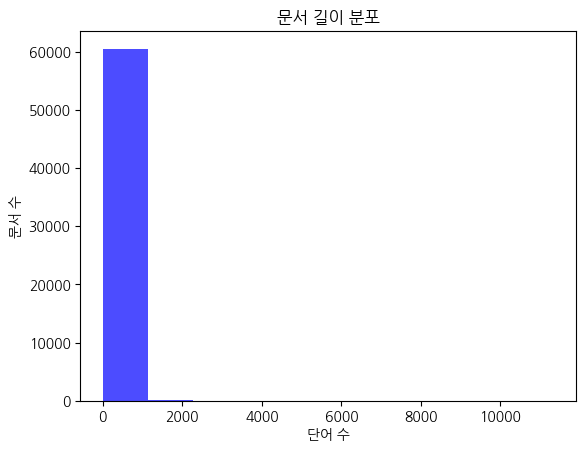

In [19]:
# 문서 길이 계산 (단어 수 기준)
wikipedia_df['text_length'] = wikipedia_df['text'].apply(lambda x: len(x.split()))

# 문서 길이 출력
print("문서의 길이 (단어 수):")
print(wikipedia_df[['document_id', 'title', 'text_length']])

# 문서 길이 분포 시각화
plt.hist(wikipedia_df['text_length'], bins=10, color='blue', alpha=0.7)
plt.title('문서 길이 분포')
plt.xlabel('단어 수')
plt.ylabel('문서 수')
plt.show()

문서의 길이 (토큰 수):
      document_id            title  token_length
0               0            나라 목록           223
1               1            나라 목록          1131
2               2              백남준          2482
3               3          아오조라 문고           303
4               4          아오조라 문고           257
...           ...              ...           ...
60608       60608  오키나와 현립 박물관·미술관           302
60609       60609  오키나와 현립 박물관·미술관           445
60610       60610  오키나와 현립 박물관·미술관           158
60611       60611   단결권 및 단체교섭권 협약           135
60612       60612   단결권 및 단체교섭권 협약           190

[60613 rows x 3 columns]


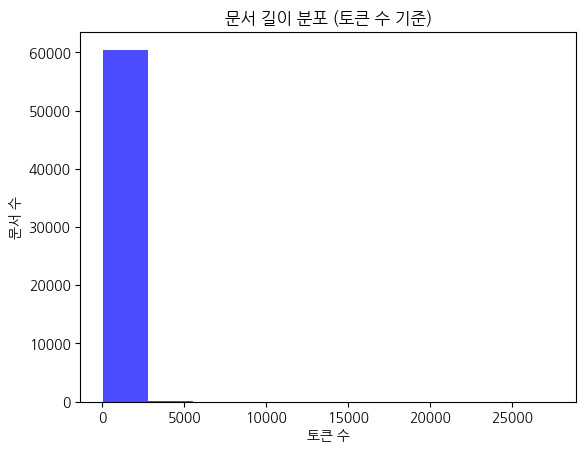

In [20]:
# KLUE BERT 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('klue/bert-base')

# 문서 길이 계산 (토큰 수 기준)
wikipedia_df['token_length'] = wikipedia_df['text'].apply(lambda x: len(tokenizer.tokenize(x)))

# 문서 길이 출력 (토큰 수 기준)
print("문서의 길이 (토큰 수):")
print(wikipedia_df[['document_id', 'title', 'token_length']])

# 문서 길이 분포 시각화 (토큰 수 기준)
plt.hist(wikipedia_df['token_length'], bins=10, color='blue', alpha=0.7)
plt.title('문서 길이 분포 (토큰 수 기준)')
plt.xlabel('토큰 수')
plt.ylabel('문서 수')
plt.show()

4. 중복된 문서 확인

In [21]:
# 중복된 문서 내용 확인
duplicate_texts = wikipedia_df[wikipedia_df.duplicated(subset='text', keep=False)]

duplicate_texts.to_csv('duplicate_texts.csv', index=False)
duplicate_texts[['document_id', 'title', 'text']]

,document_id,title,text
0,0,나라 목록,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개..."
1,1,나라 목록,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...
2,2,백남준,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...
3,3,아오조라 문고,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로..."
4,4,아오조라 문고,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...
...,...,...,...
59091,59091,티베트 자치구의 코로나19 범유행,세계보건기구(WHO)는 12일 2019년 12월 31일 처음 WHO의 주목을 받았던...
60263,60263,노농동맹,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...
60264,60264,노농동맹,당시 교조주의 입장에서 농업 문제를 바라봤던 율리우스 마르토프(Юлий Мартов...
60390,60390,헤미스 국립공원,이 공원은 개채군이 많아 충분한 균형이 이루어지고 있다. 또한 생태 균형이 알맞게 ...


In [22]:
# 중복된 문서 제목 확인
duplicate_titles = wikipedia_df[wikipedia_df.duplicated(subset='title', keep=False)]

duplicate_titles.to_csv('duplicate_titles.csv', index=False)
duplicate_titles[['document_id', 'title', 'text']]

,document_id,title,text
0,0,나라 목록,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개..."
1,1,나라 목록,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...
2,2,백남준,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...
3,3,아오조라 문고,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로..."
4,4,아오조라 문고,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...
...,...,...,...
60608,60608,오키나와 현립 박물관·미술관,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ..."
60609,60609,오키나와 현립 박물관·미술관,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)..."
60610,60610,오키나와 현립 박물관·미술관,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...
60611,60611,단결권 및 단체교섭권 협약,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...


5. 빈도수 높은 단어, 토큰 확인

In [23]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

# 모든 문서의 텍스트를 하나로 병합
all_text = " ".join(wikipedia_df['text'])

# 단어 빈도 계산
word_counts = Counter(all_text.split())

# 상위 30개의 빈도 높은 단어 출력
common_words = word_counts.most_common(30)
print("상위 30개 빈도 높은 단어:")
for word, count in common_words:
    print(f"{word}: {count} 개")

상위 30개 빈도 높은 단어:
있다.: 61281 개
이: 49604 개
*: 43667 개
수: 42376 개
그: 35476 개
있는: 28108 개
그는: 19581 개
-: 17783 개
한: 17238 개
이후: 16999 개
되었다.: 16860 개
및: 16578 개
대한: 16532 개
:: 16270 개
한다.: 15648 개
같은: 15527 개
다른: 15218 개
함께: 15090 개
위해: 15044 개
그의: 14660 개
등: 14332 개
것을: 13790 개
또한: 13593 개
중: 13269 개
두: 12290 개
때: 12062 개
그러나: 11591 개
때문에: 11372 개
가장: 11264 개
것으로: 11227 개


In [24]:
# 모든 문서의 토큰화 수행
all_tokens = []
for text in wikipedia_df['text']:
    tokens = tokenizer.tokenize(text)  # 문서를 토큰화
    all_tokens.extend(tokens)  # 모든 토큰을 리스트에 추가

# 토큰 빈도 계산
token_counts = Counter(all_tokens)

# 상위 30개의 빈도 높은 토큰 출력
top_30_tokens = token_counts.most_common(30)
print("상위 30개 빈도 높은 토큰:")
for token, count in top_30_tokens:
    print(f"{token}: {count} 개")

상위 30개 빈도 높은 토큰:
.: 668448 개
##의: 540835 개
,: 512828 개
##는: 509999 개
##다: 475335 개
##에: 458447 개
##을: 440675 개
[UNK]: 375747 개
##이: 303802 개
(: 285014 개
): 284742 개
##은: 281501 개
##를: 247436 개
##년: 222093 개
##하: 216671 개
##가: 183184 개
있: 179510 개
##고: 176667 개
##에서: 175856 개
##로: 170809 개
##었: 164158 개
##으로: 162944 개
##한: 143112 개
##되: 126488 개
##과: 117008 개
##했: 101483 개
##게: 100150 개
##였: 100144 개
##지: 99982 개
##들: 92810 개
